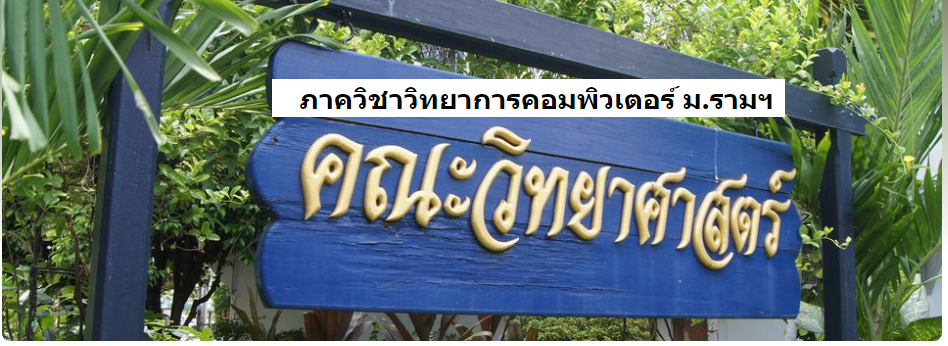

## <span style='color:blue;'>The Log Transformations</span>  
Image enhancement using log transformation is a technique used in image processing to enhance the contrast of an image, particularly in the darker areas. This technique is especially useful for images with a high dynamic range. The log transformation works by mapping the values of pixels in an image to a logarithmic scale. This mapping expands the dark pixels in an image while compressing the brighter pixels..

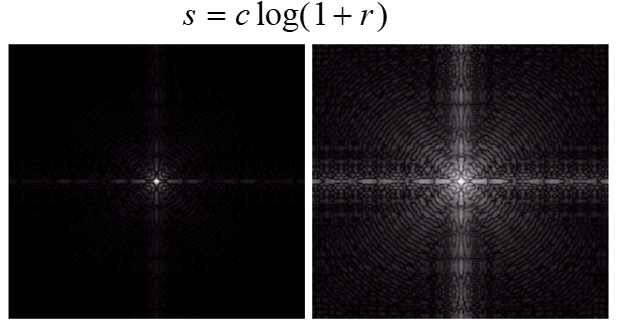

Here's a brief explanation of how it works:

1. **<i><span style='color:blue;'> A Log Transformations Function:</span> </i>** The core of this method is the logarithm transformation function, which is defined as  **<i><span style='color:blue;'> s=c⋅log(1+r)</span> </i>** ,  where: **<i>s</i>** is the output pixel value. **<i>r</i>** is the input pixel value. **<i>c</i>** is positive a constant.

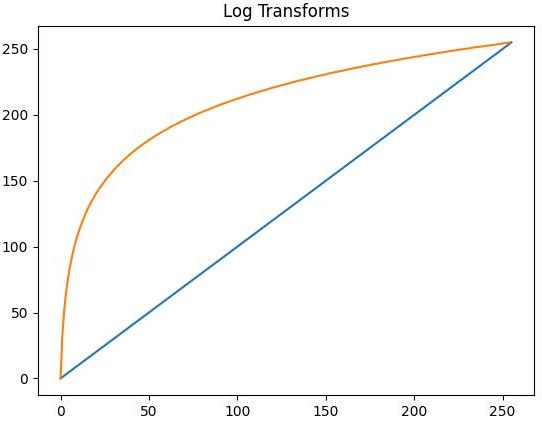

2. **<i><span style='color:blue;'>The constant  c</span> </i>** is often chosen to design as  **<i>255/(np.log(1+ np.max(x)))</i>**.

3. **<i><span style='color:blue;'>Application:</span> </i>**  This transformation is applied to each pixel in the image. For color images, it can be applied to each color channel independently.






## <span style='color:lightblue;'>Let's start</span>  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <span style='color:lightgreen;'>Read Image</span>  

In [2]:
img = cv2.imread("./images/dark2.png", 0)

In [6]:
img_float = img.astype(np.float16)
c = 255/(np.log(1+ np.amax(img_float)))
print(np.amax(img_float), np.log(1+ np.amax(img_float)))


50.0 3.9318256327243257


### <span style='color:lightgreen;'>Method I of The Logarithm Transformation</span>  

In [7]:
log_img = c * np.log(1 + img_float) 
log_img = log_img.astype(np.uint8)

In [8]:
cv2.imshow("result", log_img)
cv2.waitKey()
cv2.destroyAllWindows()

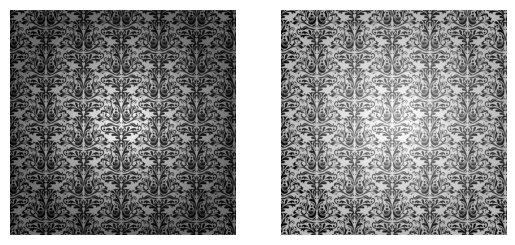

In [6]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img, cmap='gray')
plt.axis('off')

plt.show()

### <span style='color:lightgreen;'>Method II of  The Logarithm Transformation</span>  

In [9]:
log_img1 = np.zeros_like(img, dtype='float')
row, col = log_img1.shape
print(row,col)

700 700


In [10]:
for i in range(row):
    for j in range(col):
        log_img1[i,j] =  c * np.log(1 + img_float[i,j]) 

log_img1 = log_img1.astype(np.uint8) 

In [11]:
cv2.imshow("result", log_img1)
cv2.waitKey()
cv2.destroyAllWindows()

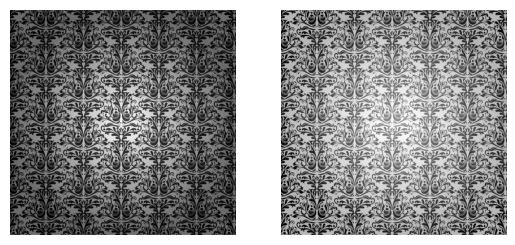

In [11]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img1, cmap='gray')
plt.axis('off')

plt.show()

### <span style='color:lightgreen;'>>Method III of  The Logarithm Transformation</span>  

In [12]:
table = np.array([ i for i in range(256)]).astype(np.float16)
log_table = c* np.log(1 + table) 
log_table = log_table.astype(np.uint8)

In [13]:
log_img2 = cv2.LUT(img, log_table)

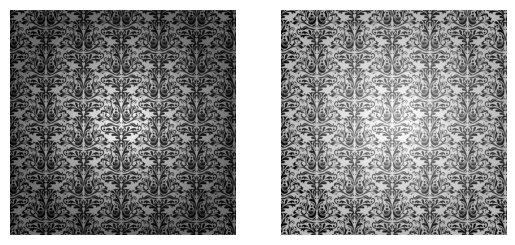

In [14]:
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(log_img2, cmap='gray')
plt.axis('off')

plt.show()